In [34]:
import pandas as pd

def load_boston():
    # Load the dataset
    df = pd.read_csv('/content/sample_data/boston_house_prices.csv')

    # Separate the features and target
    print(df.head())
    x = df.drop('MEDV', axis=1).values
    y = df['MEDV'].values

    return x, y

In [35]:
import numpy as np
# load boston housing price dataset
x,y = load_boston()
print(y.mean())
# split into training and test sets, namely 80 percent of examples goes for the training, 20 percent goes for the test set
N_train = int(0.8 * x.shape[0])
x_train = x[:N_train,:]
y_train = y[:N_train]
x_test = x[N_train:,:]
y_test = y[N_train:]

# scale features by removing mean and dividing by the standard deviation
x_bar = np.mean(x_train,axis=0)
x_std = np.std(x_train,axis=0)
x_train_scaled = (x_train - x_bar)/x_std
x_test_scaled = (x_test - x_bar)/x_std

print(x_train_scaled.shape)
print(y_train.shape)
print(x_test_scaled.shape)
print(y_test.shape)

intercept_train = np.ones((N_train,1))
x_train_scaled = np.hstack((intercept_train,x_train_scaled))

intercept_test = np.ones((x.shape[0] - N_train,1))
x_test_scaled = np.hstack((intercept_test,x_test_scaled))

print(x_train_scaled.shape)
print(x_test_scaled.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
22.532806324110677
(404, 13)
(404,)
(102, 13)
(102,)
(404, 14)
(102, 14)


In [36]:
# Step 2: Train the lasso regression model
from sklearn import linear_model
from sklearn.linear_model import Lasso
# Implement a Lasso object from sklearn.linear_model to train, set the alpha value to 0.1
### YOUR CODE HERE ###
lamda=0.1
LASSO = Lasso(alpha=lamda)
LASSO.fit(x_train_scaled, y_train)
#theta = np.random.randn(x_train_scaled.shape[1], 1)
#LASSO =1/(2*len(x))* np.sum((y-np.dot(x,theta))**2)+lamda*abs(theta)

print(LASSO.coef_)
print(LASSO.intercept_)

[ 0.         -0.97818797  0.78052038 -0.          0.52228234 -1.10867134
  3.58037106 -0.         -2.33238035  1.87566763 -1.12917626 -1.62655993
  0.         -3.58521912]
24.175742574257427


In [39]:
# Step 3: Predict the price, calculate the error and compare with the linear regression
# You will see the Lasso model is better than the simple linear model
from sklearn import metrics
# Implement the prediction
### YOUR CODE HERE ###
y_pred=LASSO.predict(x_test_scaled)


# Invoke appropriate functions in sklearn.metrics to calculate
# the Mean Absolute Error (MAE) and Mean Squared Error (MSE)
def MSE(prediction,reference):
    # Calculate the mean square error between the prediction and reference vectors
    mse = 0.5 * np.mean(np.square(prediction - reference))
    return mse

def MAE(prediction, reference):
    # Calculate the mean absolute error between the prediction and reference vectors
    mae = np.mean(np.abs(prediction - reference))
    return mae
### YOUR CODE HERE ###
mse = MSE(y_pred, y_test)
mae = MAE(y_pred, y_test)

print("MAE of LASSO model:",mae)
print("MSE of LASSO model:",mse)
print()

# Implement a LinearRegression object from sklearn.linear_model to train on the same dataset
### YOUR CODE HERE ###
LINEAR=linear_model.LinearRegression(fit_intercept=True)
LINEAR.fit(x_train_scaled, y_train)



# Predict the price using the trained linear model and calculate the MAE and MSE
### YOUR CODE HERE ###
y_pred_lin=LINEAR.predict(X=x_test_scaled)
mae_lin=MAE(y_pred_lin, y_test)
mse_lin=MSE(y_pred_lin, y_test)

print("MAE of linear model:",mae_lin)
print("MSE of linear model:",mse_lin)

MAE of LASSO model: 4.373323003374425
MSE of LASSO model: 14.21838542982384

MAE of linear model: 4.7300172509610166
MSE of linear model: 16.39993134010341


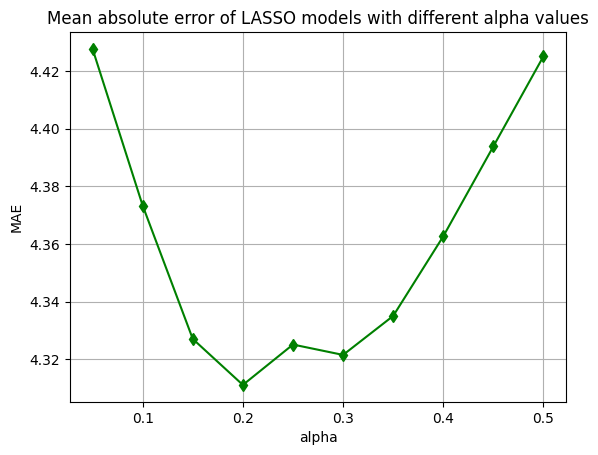

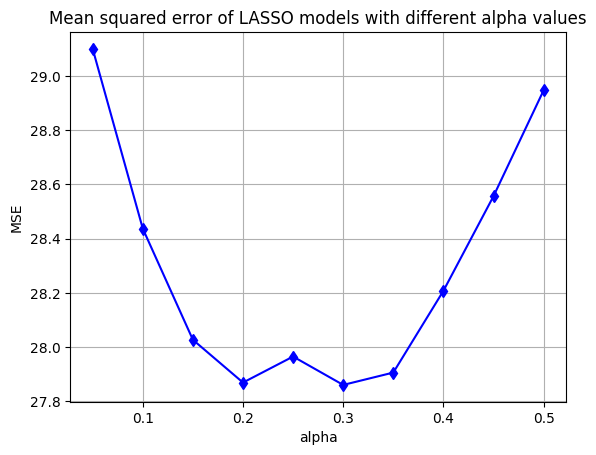

In [42]:
# Step 4: Compare the performance of models with different alpha values
# Through observing the prediction error, you can select out the best alpha value
import matplotlib.pyplot as plt
mae_list=np.zeros(10)
mse_list=np.zeros(10)
alpha_list=np.arange(0.05,0.51,0.05)
# Equip the Lasso model with alpha values above
for i in range(10):
    ### YOUR CODE HERE ###
    LASSO = Lasso(alpha=alpha_list[i])
    LASSO.fit(x_train_scaled, y_train)

    y_pred=LASSO.predict(x_test_scaled)
    mae_list[i]=metrics.mean_absolute_error(y_test, y_pred)
    mse_list[i]=metrics.mean_squared_error(y_test, y_pred)

plt.figure(0)
plt.plot(alpha_list,mae_list,'gd-')
plt.title('Mean absolute error of LASSO models with different alpha values')
plt.xlabel('alpha')
plt.ylabel('MAE')
plt.grid()
plt.figure(1)
plt.plot(alpha_list,mse_list,'bd-')
plt.title('Mean squared error of LASSO models with different alpha values')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.grid()